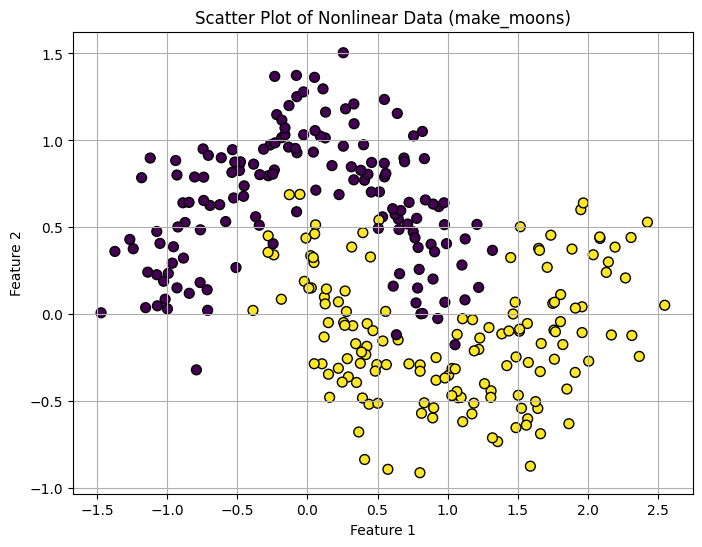

テストデータの精度: 0.92

分類レポート:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.94      0.92      0.93        52

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



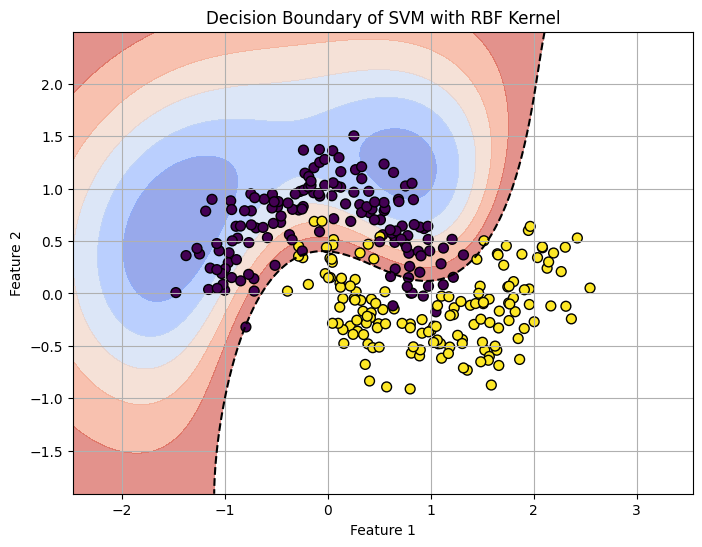

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. 非線形データ生成
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# データの可視化
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.title("Scatter Plot of Nonlinear Data (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# 2. データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 非線形SVMモデルの構築（RBFカーネル）
svm_model = SVC(kernel='rbf', C=1.0, gamma=0.5, random_state=42)

# 4. モデルの学習
svm_model.fit(X_train, y_train)

# 5. テストデータで予測
y_pred = svm_model.predict(X_test)

# 6. モデルの精度を計算
accuracy = accuracy_score(y_test, y_pred)
print(f"テストデータの精度: {accuracy:.2f}")
print("\n分類レポート:\n", classification_report(y_test, y_pred))

# 7. 決定境界のプロット
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

# 各点で予測
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 境界のプロット
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap="coolwarm", alpha=0.6)
plt.contour(xx, yy, Z, levels=[0], colors="k", linestyles="--")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Decision Boundary of SVM with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
